In [127]:
import numpy as np
import pandas as pd

In [128]:
df = pd.read_csv('spam.csv')

In [129]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [130]:
df.shape

(5572, 5)

In [131]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True, axis=1)

In [132]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Level 1 preprocessing

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [134]:
df.duplicated().sum()

403

In [135]:
df.drop_duplicates(inplace = True)

In [136]:
df.duplicated().sum()

0

In [137]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [138]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [139]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [140]:
df['target'] = encoder.fit_transform(df['target'])

In [141]:
df.sample(5)

,target,text
4853,0,"Also north carolina and texas atm, you would j..."
1838,1,Hack Chat. Get backdoor entry into 121 chat ro...
4738,0,We have pizza if u want
4594,0,Yo sorry was in the shower sup
3835,0,Then Ì_ come n pick me at 530 ar?


In [142]:
df.isnull().sum()

target    0
text      0
dtype: int64

###  Exploratory Data Analysis

In [143]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [144]:
#wow! its a imbalance data

In [145]:
import plotly.express as px

In [322]:
fig = px.pie(df['target'].value_counts(),values=df['target'].value_counts(),names=['ham','spam'])
fig.show()

In [147]:
import nltk

In [148]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\korak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
df['num_char'] = df['text'].apply(len)

In [150]:
df.head(2)

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [151]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [152]:
df.head(2)

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [153]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [154]:
df.head(2)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [155]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [156]:
# ham
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [157]:
# spam
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [158]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

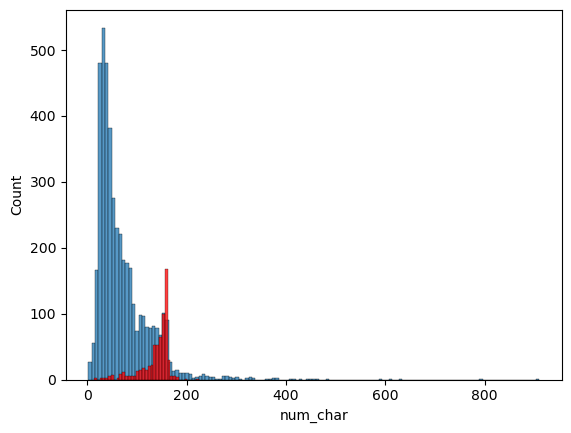

In [159]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

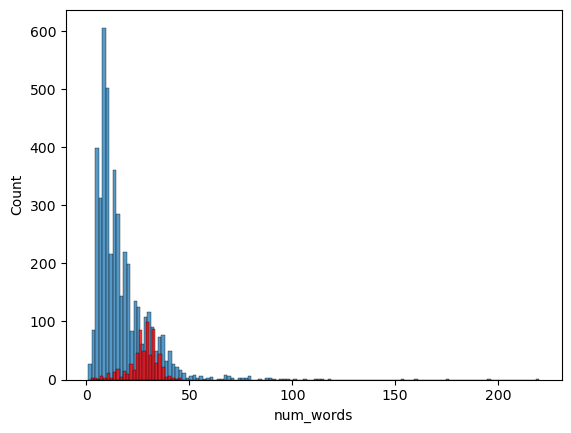

In [160]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

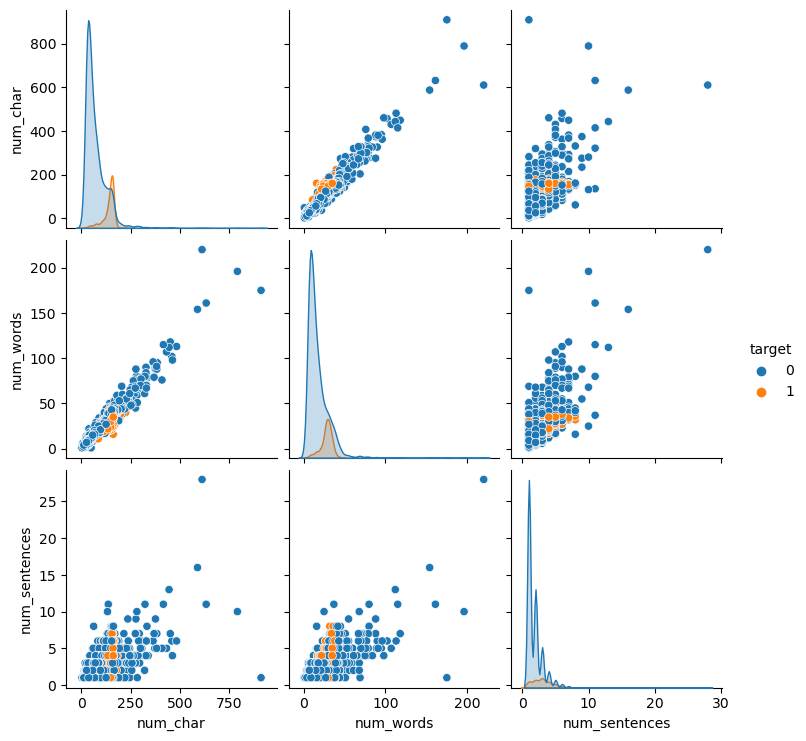

In [161]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

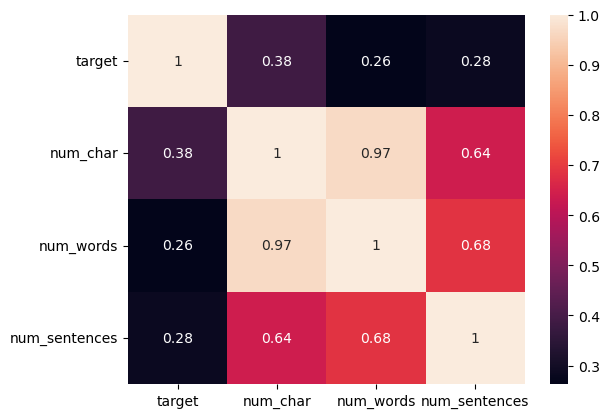

In [162]:
sns.heatmap(df.corr(),annot=True)

## Level 2 preprocessing

In [163]:
# here its text preprocessing so firstly i) convert to lower case , then ii) Tokenization, iii) removing special characters-
# - stop words and punctuation and lastly iv) stemming 

In [164]:
from nltk.stem.porter import PorterStemmer

In [165]:
from nltk.corpus import stopwords
import string

In [166]:
ps = PorterStemmer()

In [167]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [168]:
df['transformed_text'] = df['text'].apply(transform_text)

In [169]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\korak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
df.head(2)

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [171]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [337]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [338]:
import matplotlib.pyplot as plt

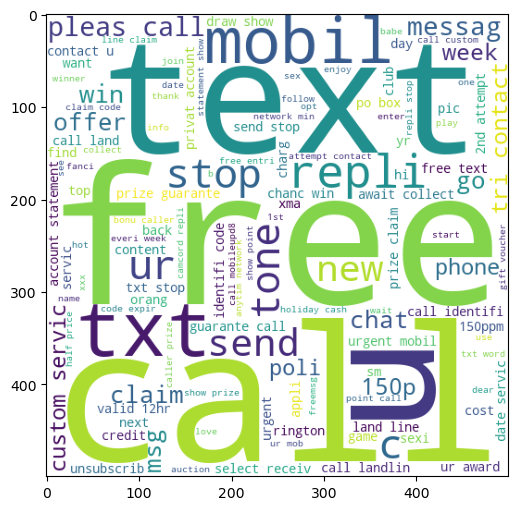

In [339]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.savefig('sample_plot1.png')

In [175]:
import matplotlib.pyplot as plt

In [327]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

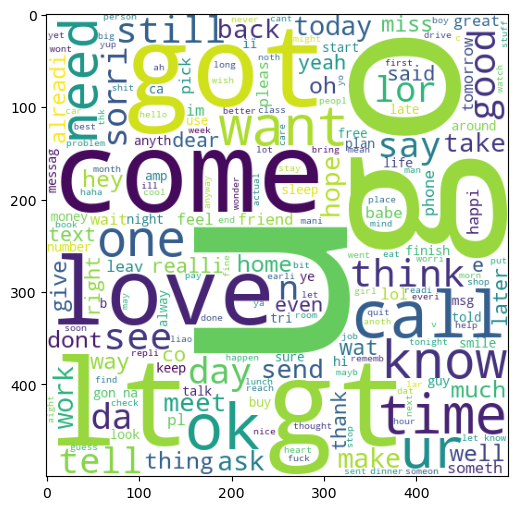

In [328]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.savefig('sample_plot2.png')

In [340]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [341]:
len(spam_corpus)

9939

In [342]:
from collections import Counter

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



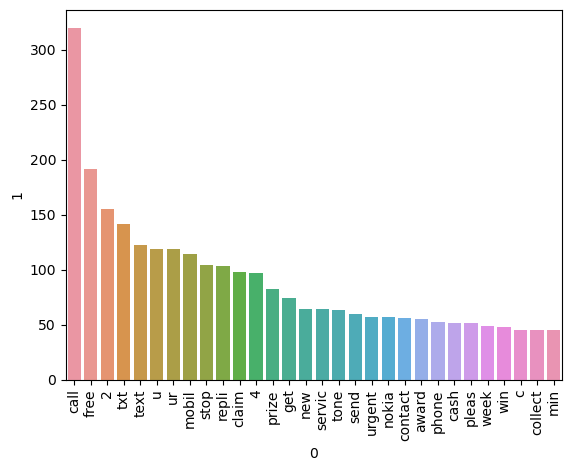

<Figure size 640x480 with 0 Axes>

In [343]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('sample_plot3.png')

In [334]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [335]:
len(ham_corpus)

35394

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



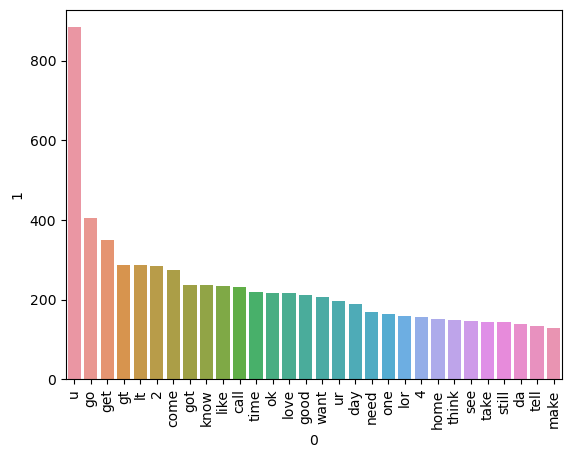

<Figure size 640x480 with 0 Axes>

In [336]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('sample_plot4.png')

## Model 

In [185]:
# have to vectorize text first
# i will use bag of words then tfidf and lastly word2vec to find which vectorization technique give me the better accuracy and precision 

In [186]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#### bag of words

In [187]:
cv = CountVectorizer()

In [188]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [189]:
X.shape

(5169, 6708)

In [190]:
y = df['target'].values

In [191]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [194]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [195]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [196]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8646034816247582
[[784 124]
 [ 16 110]]
0.4700854700854701


In [197]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[890  18]
 [  8 118]]
0.8676470588235294


In [198]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


#### tfidf

In [229]:
tfidf = TfidfVectorizer()

In [230]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [231]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [232]:
X.shape

(5169, 6708)

In [233]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [205]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [206]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8558994197292069
[[784 124]
 [ 25 101]]
0.4488888888888889


In [207]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[908   0]
 [ 33  93]]
1.0


In [208]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[907   1]
 [ 25 101]]
0.9901960784313726


In [223]:
# im taking tfidf - MNB due to good precision score as accuracy doesnt matter due imbalance data

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [225]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [226]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [235]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [236]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9818181818181818


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9387755102040817
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9345794392523364
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8429752066115702
For  ETC
Accuracy -  0.9777562862669246
Precision -  1.0
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.8947368421052632
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9203539823008849


In [237]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [238]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.973888,1.000000
8,ETC,0.977756,1.000000
0,SVC,0.980658,0.981818
4,LR,0.961315,0.938776
6,AdaBoost,0.968085,0.934579
10,xgb,0.970019,0.920354
9,GBDT,0.950677,0.894737
7,BgC,0.958414,0.842975


In [239]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [311]:
tfidf = TfidfVectorizer(max_features=3000)

In [312]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [313]:
X.shape

(5169, 3000)

In [314]:
y = df['target'].values

In [315]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [263]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [246]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.9734513274336283


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



For  KN
Accuracy -  0.9187620889748549
Precision -  1.0
For  NB
Accuracy -  0.9787234042553191
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.7894736842105263
For  LR
Accuracy -  0.9642166344294004
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.8990825688073395
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8416666666666667
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9722222222222222
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9213483146067416
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9043478260869565


In [247]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [248]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [249]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.907157,1.000000,0.918762,1.000000
1,NB,0.968085,1.000000,0.978723,1.000000
2,RF,0.973888,1.000000,0.978723,1.000000
3,ETC,0.977756,1.000000,0.976789,0.972222
4,SVC,0.980658,0.981818,0.981625,0.973451
5,LR,0.961315,0.938776,0.964217,0.949495
6,AdaBoost,0.968085,0.934579,0.962282,0.899083
7,xgb,0.970019,0.920354,0.968085,0.904348
8,GBDT,0.950677,0.894737,0.950677,0.921348
9,BgC,0.958414,0.842975,0.957447,0.841667


In [ ]:
# NOW Applying scaling 

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [253]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9396551724137931


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



For  KN
Accuracy -  0.9158607350096711
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  0.9338842975206612
For  DT
Accuracy -  0.9323017408123792
Precision -  0.7916666666666666
For  LR
Accuracy -  0.9700193423597679
Precision -  0.9896907216494846
For  RF
Accuracy -  0.9787234042553191
Precision -  1.0
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.8990825688073395
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8416666666666667
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9722222222222222
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9213483146067416
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9043478260869565


In [254]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [255]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [256]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.907157,1.000000,0.918762,1.000000,0.915861,1.000000
1,NB,0.968085,1.000000,0.978723,1.000000,0.979691,0.933884
2,RF,0.973888,1.000000,0.978723,1.000000,0.978723,1.000000
3,ETC,0.977756,1.000000,0.976789,0.972222,0.976789,0.972222
4,SVC,0.980658,0.981818,0.981625,0.973451,0.976789,0.939655
5,LR,0.961315,0.938776,0.964217,0.949495,0.970019,0.989691
6,AdaBoost,0.968085,0.934579,0.962282,0.899083,0.962282,0.899083
7,xgb,0.970019,0.920354,0.968085,0.904348,0.968085,0.904348
8,GBDT,0.950677,0.894737,0.950677,0.921348,0.950677,0.921348
9,BgC,0.958414,0.842975,0.957447,0.841667,0.957447,0.841667


In [261]:
# appending the num_character col to X
X = np.hstack((X,df['num_char'].values.reshape(-1,1)))

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [264]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



For  SVC
Accuracy -  0.8781431334622823
Precision -  0.0


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



For  KN
Accuracy -  0.9332688588007737
Precision -  0.7317073170731707
For  NB
Accuracy -  0.9487427466150871
Precision -  0.9866666666666667
For  DT
Accuracy -  0.9516441005802708
Precision -  0.8454545454545455
For  LR
Accuracy -  0.9680851063829787
Precision -  0.979381443298969
For  RF
Accuracy -  0.9816247582205029
Precision -  0.9819819819819819
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.8515625
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.84375
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9565217391304348
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.8888888888888888
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9130434782608695


In [265]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [267]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.918762,1.000000,0.915861,1.000000,0.933269,0.731707
1,NB,0.968085,1.000000,0.978723,1.000000,0.979691,0.933884,0.948743,0.986667
2,RF,0.973888,1.000000,0.978723,1.000000,0.978723,1.000000,0.981625,0.981982
3,ETC,0.977756,1.000000,0.976789,0.972222,0.976789,0.972222,0.979691,0.956522
4,SVC,0.980658,0.981818,0.981625,0.973451,0.976789,0.939655,0.878143,0.000000
5,LR,0.961315,0.938776,0.964217,0.949495,0.970019,0.989691,0.968085,0.979381
6,AdaBoost,0.968085,0.934579,0.962282,0.899083,0.962282,0.899083,0.965184,0.851562
7,xgb,0.970019,0.920354,0.968085,0.904348,0.968085,0.904348,0.970019,0.913043
8,GBDT,0.950677,0.894737,0.950677,0.921348,0.950677,0.921348,0.952611,0.888889
9,BgC,0.958414,0.842975,0.957447,0.841667,0.957447,0.841667,0.963250,0.843750


#### word2vec

In [268]:
from gensim.models import Word2Vec


In [269]:
# Assuming df['transformed_text'] contains tokenized sentences for each row
tokenized_sentences = df['transformed_text'].tolist()

# Train Word2Vec model on the entire corpus of tokenized sentences
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

# Set a fixed length for vectors (e.g., 20 words)
fixed_length = 20

# Vectorize each row in the DataFrame
vectorized_text = []
for sentence in tokenized_sentences:
    row_vector = []
    for word in sentence[:fixed_length]:  # Truncate or pad to a fixed length
        if word in model.wv:
            row_vector.extend(model.wv[word])
        else:
            # If the word is not found in the vocabulary, use zeros
            row_vector.extend(np.zeros(model.vector_size))  # Vector of zeros for unknown words
    # Padding or truncating to ensure fixed length
    if len(row_vector) < fixed_length * model.vector_size:
        row_vector += [0.0] * (fixed_length * model.vector_size - len(row_vector))
    else:
        row_vector = row_vector[:fixed_length * model.vector_size]
    vectorized_text.append(row_vector)

# Convert the list of lists to a NumPy array
vectorized_array = np.array(vectorized_text).reshape(-1, fixed_length * model.vector_size)

In [270]:
vectorized_array.shape

(5169, 2000)

In [271]:
vectorized_array

array([[ 0.2116181 ,  0.14119567,  0.06901675, ...,  0.11202407,
         0.04228504,  0.00425996],
       [-0.25000274,  0.305792  ,  0.00757979, ..., -0.0459292 ,
         0.02983749,  0.18511583],
       [ 0.20837815,  0.00498418,  0.1070224 , ..., -0.00836912,
        -0.07561509,  0.13399416],
       ...,
       [ 0.17102428, -0.18172605,  0.02607436, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2116181 ,  0.14119567,  0.06901675, ...,  0.02650194,
        -0.0710452 ,  0.1271129 ],
       [ 0.12321525,  0.00528495,  0.05192781, ...,  0.        ,
         0.        ,  0.        ]])

In [272]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vectorized_array = scaler.fit_transform(vectorized_array)

In [273]:
X_train,X_test,y_train,y_test = train_test_split(vectorized_array,y,test_size=0.2,random_state=12)

In [274]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8597678916827853
[[831  77]
 [ 68  58]]
0.42962962962962964


In [275]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [276]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



For  SVC
Accuracy -  0.8781431334622823
Precision -  0.0


D:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



For  KN
Accuracy -  0.9177949709864603
Precision -  0.7887323943661971
For  NB
Accuracy -  0.8868471953578336
Precision -  0.5529411764705883
For  DT
Accuracy -  0.9052224371373307
Precision -  0.7413793103448276
For  LR
Accuracy -  0.9110251450676983
Precision -  0.7361111111111112
For  RF
Accuracy -  0.9361702127659575
Precision -  0.9054054054054054
For  AdaBoost
Accuracy -  0.9013539651837524
Precision -  0.6395348837209303
For  BgC
Accuracy -  0.9303675048355899
Precision -  0.875
For  ETC
Accuracy -  0.9332688588007737
Precision -  0.9384615384615385
For  GBDT
Accuracy -  0.9177949709864603
Precision -  0.8867924528301887
For  xgb
Accuracy -  0.9323017408123792
Precision -  0.8589743589743589


In [277]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [278]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.933269,0.938462
5,RF,0.936170,0.905405
9,GBDT,0.917795,0.886792
7,BgC,0.930368,0.875000
10,xgb,0.932302,0.858974
1,KN,0.917795,0.788732
3,DT,0.905222,0.741379
4,LR,0.911025,0.736111
6,AdaBoost,0.901354,0.639535
2,NB,0.886847,0.552941


#### Voting Classifier

In [316]:
from sklearn.ensemble import VotingClassifier

In [317]:
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [318]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [319]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [320]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 1.0


In [307]:
# Applying stacking
estimators=[('rfc', rfc), ('nb', mnb), ('et', etc)]
final_estimator=SVC()

In [308]:
from sklearn.ensemble import StackingClassifier

In [309]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [310]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9827586206896551


In [321]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))